In [3]:
# Importing Libraries

from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests

## EDA Analyze ve Data Cleaning

In [5]:
df=pd.read_csv(r'C:\Users\Lenovo\Documents\GitHub\Web_Scraping & Machine_Learning\cars_data_son2.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30535 entries, 0 to 30534
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30535 non-null  int64 
 1   0           30535 non-null  object
 2   1           30535 non-null  object
 3   2           30535 non-null  object
dtypes: int64(1), object(3)
memory usage: 954.3+ KB


In [7]:
df.columns = df.columns.map(str.strip)
df.columns

Index(['Unnamed: 0', '0', '1', '2'], dtype='object')

In [8]:
df.head(5)

,Unnamed: 0,0,1,2
0,0,425.900 TL,ADANA / SEYHAN / MERKEZ,İlan No: 15022195 İlan Tarihi: 21 Temmuz 2...
1,1,429.900 TL,ADANA / SEYHAN / MERKEZ,İlan No: 15022088 İlan Tarihi: 21 Temmuz 2...
2,2,129.900 TL,ADANA / SEYHAN / YEŞİLOBA MAHALLESİ,İlan No: 14998892 İlan Tarihi: 18 Temmuz 2...
3,3,119.900 TL,ADANA / SEYHAN / YEŞİLOBA MAHALLESİ,İlan No: 14991597 İlan Tarihi: 17 Temmuz 2...
4,4,178.000 TL,ADANA / SEYHAN / YEŞİLOBA MAHALLESİ,İlan No: 14979715 İlan Tarihi: 16 Temmuz 2...


Dataframe kopyalanıyor.

In [9]:
cars = df.copy()

In [10]:
cars.columns = cars.columns.map(str.strip)
cars.columns

Index(['Unnamed: 0', '0', '1', '2'], dtype='object')

In [11]:
cars.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
cars.rename(columns={'0': 'Fiyat'}, inplace=True)
cars.rename(columns={'1': 'İl'}, inplace=True)
cars.rename(columns={'2': 'Açıklama'}, inplace=True)

In [13]:
cars.head(5)

,Fiyat,İl,Açıklama
0,425.900 TL,ADANA / SEYHAN / MERKEZ,İlan No: 15022195 İlan Tarihi: 21 Temmuz 2...
1,429.900 TL,ADANA / SEYHAN / MERKEZ,İlan No: 15022088 İlan Tarihi: 21 Temmuz 2...
2,129.900 TL,ADANA / SEYHAN / YEŞİLOBA MAHALLESİ,İlan No: 14998892 İlan Tarihi: 18 Temmuz 2...
3,119.900 TL,ADANA / SEYHAN / YEŞİLOBA MAHALLESİ,İlan No: 14991597 İlan Tarihi: 17 Temmuz 2...
4,178.000 TL,ADANA / SEYHAN / YEŞİLOBA MAHALLESİ,İlan No: 14979715 İlan Tarihi: 16 Temmuz 2...


In [14]:
cars['Fiyat'] = cars.Fiyat.str.split(expand=True,)[0]
cars['İl'] = cars.İl.str.split(expand=True,)[0]

Açıklama kolonunu split ile kolonlara ayırıyoruz.

In [15]:
new = cars["Açıklama"].str.split(":", n = 45, expand = True) 
# print('new', new)
  
for i in range(0,18):
    cars[i]= new[i] 


In [16]:
cars.head()

,Fiyat,İl,Açıklama,0,1,2,3,4,5,6,...,8,9,10,11,12,13,14,15,16,17
0,425.900,ADANA,İlan No: 15022195 İlan Tarihi: 21 Temmuz 2...,İlan No,15022195 İlan Tarihi,21 Temmuz 2020 Marka,BMW Seri,2 Serisi Model,218i Gran Coupe First Edition M Sport Yıl,2020 Yakıt Tipi,...,Otomatik Motor Hacmi,1499 cc Motor Gücü,140 hp Kilometre,0 km Boya-değişen,Tamamı orjinal Takasa Uygun,Takasa Uygun Kimden,Galeriden,None,None,None
1,429.900,ADANA,İlan No: 15022088 İlan Tarihi: 21 Temmuz 2...,İlan No,15022088 İlan Tarihi,21 Temmuz 2020 Marka,Volkswagen Seri,Passat Model,1.6 TDi Elegance Yıl,2020 Yakıt Tipi,...,Yarı Otomatik Motor Hacmi,1598 cc Motor Gücü,120 hp Kilometre,3.900 km Boya-değişen,Tamamı orjinal Takasa Uygun,Takasa Uygun Kimden,Galeriden,None,None,None
2,129.900,ADANA,İlan No: 14998892 İlan Tarihi: 18 Temmuz 2...,İlan No,14998892 İlan Tarihi,18 Temmuz 2020 Marka,Ford Seri,Focus Model,1.5 TDCi Trend X Yıl,2015 Yakıt Tipi,...,Yarı Otomatik Motor Hacmi,1499 cc Motor Gücü,120 hp Kilometre,136.023 km Boya-değişen,"2 değişen, 1 boyalı Takasa Uygun",Takasa Uygun Değil Kimden,Galeriden,None,None,None
3,119.900,ADANA,İlan No: 14991597 İlan Tarihi: 17 Temmuz 2...,İlan No,14991597 İlan Tarihi,17 Temmuz 2020 Marka,Skoda Seri,Fabia Model,1.2 TSI Style Yıl,2015 Yakıt Tipi,...,Düz Motor Hacmi,1197 cc Motor Gücü,90 hp Kilometre,136.023 km Boya-değişen,1 boyalı Takasa Uygun,Takasa Uygun Değil Kimden,Galeriden,None,None,None
4,178.000,ADANA,İlan No: 14979715 İlan Tarihi: 16 Temmuz 2...,İlan No,14979715 İlan Tarihi,16 Temmuz 2020 Marka,Renault Seri,Megane Model,1.5 dCi Touch Yıl,2018 Yakıt Tipi,...,Yarı Otomatik Motor Hacmi,1461 cc Motor Gücü,110 hp Kilometre,60.159 km Boya-değişen,Tamamı orjinal Takasa Uygun,Takasa Uygun Kimden,Galeriden,None,None,None


İstemediğimiz alanları dataframe den çıkarıyoruz.

In [17]:
cars.drop(columns=['Açıklama'], inplace=True)
cars.drop(columns=[0], inplace=True)
cars.drop(columns=[1], inplace=True)
cars.drop(columns=[2], inplace=True)
cars.drop(columns=[12], inplace=True)
cars.drop(columns=[13], inplace=True)
cars.drop(columns=[14], inplace=True)
cars.drop(columns=[15], inplace=True)
cars.drop(columns=[16], inplace=True)
cars.drop(columns=[17], inplace=True)

In [18]:
cars.rename(columns={3: 'Marka'}, inplace=True)
cars.rename(columns={4: 'Model'}, inplace=True)
cars.rename(columns={5: 'Model_2'}, inplace=True)
cars.rename(columns={6: 'Yıl'}, inplace=True)
cars.rename(columns={7: 'YakıtTipi'}, inplace=True)
cars.rename(columns={8: 'VitesTipi'}, inplace=True)
cars.rename(columns={9: 'MotorHacmi'}, inplace=True)
cars.rename(columns={10: 'MotorGücü'}, inplace=True)
cars.rename(columns={11: 'Kilometre'}, inplace=True)

In [19]:
cars.head()

,Fiyat,İl,Marka,Model,Model_2,Yıl,YakıtTipi,VitesTipi,MotorHacmi,MotorGücü,Kilometre
0,425.900,ADANA,BMW Seri,2 Serisi Model,218i Gran Coupe First Edition M Sport Yıl,2020 Yakıt Tipi,Benzin Vites Tipi,Otomatik Motor Hacmi,1499 cc Motor Gücü,140 hp Kilometre,0 km Boya-değişen
1,429.900,ADANA,Volkswagen Seri,Passat Model,1.6 TDi Elegance Yıl,2020 Yakıt Tipi,Dizel Vites Tipi,Yarı Otomatik Motor Hacmi,1598 cc Motor Gücü,120 hp Kilometre,3.900 km Boya-değişen
2,129.900,ADANA,Ford Seri,Focus Model,1.5 TDCi Trend X Yıl,2015 Yakıt Tipi,Dizel Vites Tipi,Yarı Otomatik Motor Hacmi,1499 cc Motor Gücü,120 hp Kilometre,136.023 km Boya-değişen
3,119.900,ADANA,Skoda Seri,Fabia Model,1.2 TSI Style Yıl,2015 Yakıt Tipi,Benzin Vites Tipi,Düz Motor Hacmi,1197 cc Motor Gücü,90 hp Kilometre,136.023 km Boya-değişen
4,178.000,ADANA,Renault Seri,Megane Model,1.5 dCi Touch Yıl,2018 Yakıt Tipi,Dizel Vites Tipi,Yarı Otomatik Motor Hacmi,1461 cc Motor Gücü,110 hp Kilometre,60.159 km Boya-değişen


Kolonlardaki istemediğimiz kelimeleri replace ile yok ediyoruz.

In [31]:
cars.Marka.replace('Seri', '', regex=True, inplace=True)
cars.Model.replace('Model', '', regex=True, inplace=True)
cars.Model_2.replace('Yıl', '', regex=True, inplace=True)
cars.Yıl.replace('Yakıt Tipi', '', regex=True, inplace=True)
cars.YakıtTipi.replace('Vites Tipi', '', regex=True, inplace=True)
cars.VitesTipi.replace('Motor Hacmi', '', regex=True, inplace=True)
cars.MotorHacmi.replace('cc Motor Gücü', ' ', regex=True, inplace=True)
cars.MotorGücü.replace('hp Kilometre', ' ', regex=True, inplace=True)
cars.Kilometre.replace('km Boya-değişen', ' ', regex=True, inplace=True)
cars.MotorHacmi.replace("cm3", ' ', regex=True, inplace=True)
cars.MotorGücü.replace('HP', ' ', regex=True, inplace=True)

In [32]:
cars.head()

,Fiyat,İl,Marka,Model,Model_2,Yıl,YakıtTipi,VitesTipi,MotorHacmi,MotorGücü,Kilometre
0,425900,ADANA,BMW,2 Serisi,218i Gran Coupe First Edition M Sport,2020,Benzin,Otomatik,1499 cc Motor Gücü,140 hp Kilometre,0
1,429900,ADANA,Volkswagen,Passat,1.6 TDi Elegance,2020,Dizel,Yarı Otomatik,1598 cc Motor Gücü,120 hp Kilometre,3900
2,129900,ADANA,Ford,Focus,1.5 TDCi Trend X,2015,Dizel,Yarı Otomatik,1499 cc Motor Gücü,120 hp Kilometre,136023
3,119900,ADANA,Skoda,Fabia,1.2 TSI Style,2015,Benzin,Düz,1197 cc Motor Gücü,90 hp Kilometre,136023
4,178000,ADANA,Renault,Megane,1.5 dCi Touch,2018,Dizel,Yarı Otomatik,1461 cc Motor Gücü,110 hp Kilometre,60159


In [33]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29705 entries, 0 to 30534
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Fiyat       29705 non-null  object
 1   İl          29705 non-null  object
 2   Marka       29705 non-null  object
 3   Model       29705 non-null  object
 4   Model_2     29705 non-null  object
 5   Yıl         29705 non-null  object
 6   YakıtTipi   29705 non-null  object
 7   VitesTipi   29705 non-null  object
 8   MotorHacmi  29705 non-null  object
 9   MotorGücü   29705 non-null  object
 10  Kilometre   29705 non-null  object
dtypes: object(11)
memory usage: 2.7+ MB


In [24]:
cars.isna().sum()

Fiyat           0
İl              0
Marka         830
Model         830
Model_2       830
Yıl           830
YakıtTipi     830
VitesTipi     830
MotorHacmi    830
MotorGücü     830
Kilometre     830
dtype: int64

In [25]:
cars.dropna(inplace=True)

In [26]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29705 entries, 0 to 30534
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Fiyat       29705 non-null  object
 1   İl          29705 non-null  object
 2   Marka       29705 non-null  object
 3   Model       29705 non-null  object
 4   Model_2     29705 non-null  object
 5   Yıl         29705 non-null  object
 6   YakıtTipi   29705 non-null  object
 7   VitesTipi   29705 non-null  object
 8   MotorHacmi  29705 non-null  object
 9   MotorGücü   29705 non-null  object
 10  Kilometre   29705 non-null  object
dtypes: object(11)
memory usage: 2.7+ MB


In [27]:
cars.columns

Index(['Fiyat', 'İl', 'Marka', 'Model', 'Model_2', 'Yıl', 'YakıtTipi',
       'VitesTipi', 'MotorHacmi', 'MotorGücü', 'Kilometre'],
      dtype='object')

In [28]:
cars['Fiyat']= cars['Fiyat'].apply(lambda x: x.split()[0].replace('.', ''))
cars['Kilometre']= cars['Kilometre'].apply(lambda x: x.split()[0].replace('.', ''))
cars['Kilometre']= cars['Kilometre'].apply(lambda x: x.split()[0].replace(',', ''))

Kolonlarda istemedeğim/hatalı oluşan satırları temizleme.

ilk önce hangi sütunda olduğunu belirtiyorum,sonrasında isin parametresinin içine hangi değeri istediğimi yazıyorum.

Doğrudan olarak m yazıp çağırdığınızda true,false döner.Aşağıdaki şekilde çağırdığınızda istediğiniz filtreleme yapılmış olur.


In [61]:
m=cars['Kilometre'].isin(['Tamamı'])

In [62]:
cars[m]

,Fiyat,İl,Marka,Model,Model_2,Yıl,YakıtTipi,VitesTipi,MotorHacmi,MotorGücü,Kilometre
1232,30000,ADANA,Seat,Cordoba,1.6 SXE,2000,Benzin,Düz Motor Gücü,76 - 100 HP Kilometre,164.000 km Boya-değişen,Tamamı
1279,23000,ADANA,Tofaş,Şahin,1.6,1998,LPG & Benzin,Düz,1581 cc Kilometre,420.000 km Boya-değişen,Tamamı
1433,71500,ADANA,Toyota,Corolla,1.33 Comfort,2011,LPG & Benzin,Düz,1329 cc Kilometre,225.000 km Boya-değişen,Tamamı
1946,15500,ADANA,Tofaş,Şahin,1.6,1993,LPG & Benzin,Düz,1581 cc Kilometre,100.000 km Boya-değişen,Tamamı
2402,118000,ADANA,Renault,Clio,1.5 dCi Touch,2016,Dizel,Otomatik,1201 - 1400 Kilometre,86.000 km Boya-değişen,Tamamı
2945,15000,ADIYAMAN,Tofaş,Şahin,1.6,1993,LPG & Benzin,Düz,1581 cc Kilometre,200.000 km Boya-değişen,Tamamı
4373,102000,AMASYA,Toyota,Corolla,1.4 D-4D Elegant,2016,Dizel,Düz,1364 cc Kilometre,116.000 km Boya-değişen,Tamamı
5981,15000,ANKARA,Tofaş,Şahin,1.6,1990,LPG & Benzin,Düz,1581 cc Kilometre,97.000 km Boya-değişen,Tamamı
6404,135000,ANKARA,Renault,Latitude,1.5 dCi Executive,2012,Dizel,Düz Motor Gücü,101 - 125 HP Kilometre,200 km Boya-değişen,Tamamı
7146,19750,ANTALYA,Tofaş,Şahin,1.6,1998,LPG & Benzin,Düz,1581 cc Kilometre,0 km Boya-değişen,Tamamı


Hatalı satırları direkt siliyorum

In [63]:
cars = cars.drop(cars[m].index)

In [64]:
cars['Yıl'] = cars['Yıl'].astype('int32')
cars['Kilometre']= cars['Kilometre'].astype('int32')
cars['Fiyat'] = cars['Fiyat'].astype(str).astype('int32')

In [65]:
cars.head()

,Fiyat,İl,Marka,Model,Model_2,Yıl,YakıtTipi,VitesTipi,MotorHacmi,MotorGücü,Kilometre
0,425900,ADANA,BMW,2 Serisi,218i Gran Coupe First Edition M Sport,2020,Benzin,Otomatik,1499 cc Motor Gücü,140 hp Kilometre,0
1,429900,ADANA,Volkswagen,Passat,1.6 TDi Elegance,2020,Dizel,Yarı Otomatik,1598 cc Motor Gücü,120 hp Kilometre,3900
2,129900,ADANA,Ford,Focus,1.5 TDCi Trend X,2015,Dizel,Yarı Otomatik,1499 cc Motor Gücü,120 hp Kilometre,136023
3,119900,ADANA,Skoda,Fabia,1.2 TSI Style,2015,Benzin,Düz,1197 cc Motor Gücü,90 hp Kilometre,136023
4,178000,ADANA,Renault,Megane,1.5 dCi Touch,2018,Dizel,Yarı Otomatik,1461 cc Motor Gücü,110 hp Kilometre,60159


In [66]:
cars.columns

Index(['Fiyat', 'İl', 'Marka', 'Model', 'Model_2', 'Yıl', 'YakıtTipi',
       'VitesTipi', 'MotorHacmi', 'MotorGücü', 'Kilometre'],
      dtype='object')

In [67]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28963 entries, 0 to 30534
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Fiyat       28963 non-null  int32 
 1   İl          28963 non-null  object
 2   Marka       28963 non-null  object
 3   Model       28963 non-null  object
 4   Model_2     28963 non-null  object
 5   Yıl         28963 non-null  int32 
 6   YakıtTipi   28963 non-null  object
 7   VitesTipi   28963 non-null  object
 8   MotorHacmi  28963 non-null  object
 9   MotorGücü   28963 non-null  object
 10  Kilometre   28963 non-null  int32 
dtypes: int32(3), object(8)
memory usage: 2.3+ MB


In [68]:
cars.isna().sum()

Fiyat         0
İl            0
Marka         0
Model         0
Model_2       0
Yıl           0
YakıtTipi     0
VitesTipi     0
MotorHacmi    0
MotorGücü     0
Kilometre     0
dtype: int64

Temizlenmiş datayı kaydettik.

In [70]:
cars.to_csv('Cars_Clean_data.csv')

In [298]:
# cars.Renk.replace('-', 'Diğer', regex=True, inplace=True)

In [299]:
# cars['Renk'] = cars.Renk.str.split(expand=True,)[0]
# cars['Renk']= cars['Renk'].apply(lambda x: x.split()[0].replace('.', ''))

In [300]:
# renk_counts = cars.Renk.value_counts()
# renk_counts

In [301]:
# other_renk = list(renk_counts[renk_counts < 6 ].index)
# print('de', other_renk)
# for i in other_renk:
#    cars.drop(cars[cars['Renk'] == i].index  , inplace=True) 

## Yeni dataframe ile yola devam

In [71]:
import pandas as pd
import numpy as np

In [72]:
new_cars =pd.read_csv(r'C:\Users\Lenovo\Documents\GitHub\Web_Scraping & Machine_Learning\Cars_Clean_data.csv')

In [73]:
new_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28963 entries, 0 to 28962
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  28963 non-null  int64 
 1   Fiyat       28963 non-null  int64 
 2   İl          28963 non-null  object
 3   Marka       28963 non-null  object
 4   Model       28963 non-null  object
 5   Model_2     28963 non-null  object
 6   Yıl         28963 non-null  int64 
 7   YakıtTipi   28963 non-null  object
 8   VitesTipi   28963 non-null  object
 9   MotorHacmi  28963 non-null  object
 10  MotorGücü   28963 non-null  object
 11  Kilometre   28963 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 2.7+ MB


In [74]:
new_cars.head()

,Unnamed: 0,Fiyat,İl,Marka,Model,Model_2,Yıl,YakıtTipi,VitesTipi,MotorHacmi,MotorGücü,Kilometre
0,0,425900,ADANA,BMW,2 Serisi,218i Gran Coupe First Edition M Sport,2020,Benzin,Otomatik,1499 cc Motor Gücü,140 hp Kilometre,0
1,1,429900,ADANA,Volkswagen,Passat,1.6 TDi Elegance,2020,Dizel,Yarı Otomatik,1598 cc Motor Gücü,120 hp Kilometre,3900
2,2,129900,ADANA,Ford,Focus,1.5 TDCi Trend X,2015,Dizel,Yarı Otomatik,1499 cc Motor Gücü,120 hp Kilometre,136023
3,3,119900,ADANA,Skoda,Fabia,1.2 TSI Style,2015,Benzin,Düz,1197 cc Motor Gücü,90 hp Kilometre,136023
4,4,178000,ADANA,Renault,Megane,1.5 dCi Touch,2018,Dizel,Yarı Otomatik,1461 cc Motor Gücü,110 hp Kilometre,60159


In [75]:
new_cars.rename(columns={'MotorTipi' :'VitesTipi'}, inplace=True)


In [76]:
new_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28963 entries, 0 to 28962
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  28963 non-null  int64 
 1   Fiyat       28963 non-null  int64 
 2   İl          28963 non-null  object
 3   Marka       28963 non-null  object
 4   Model       28963 non-null  object
 5   Model_2     28963 non-null  object
 6   Yıl         28963 non-null  int64 
 7   YakıtTipi   28963 non-null  object
 8   VitesTipi   28963 non-null  object
 9   MotorHacmi  28963 non-null  object
 10  MotorGücü   28963 non-null  object
 11  Kilometre   28963 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 2.7+ MB


In [77]:
new_cars.head()

,Unnamed: 0,Fiyat,İl,Marka,Model,Model_2,Yıl,YakıtTipi,VitesTipi,MotorHacmi,MotorGücü,Kilometre
0,0,425900,ADANA,BMW,2 Serisi,218i Gran Coupe First Edition M Sport,2020,Benzin,Otomatik,1499 cc Motor Gücü,140 hp Kilometre,0
1,1,429900,ADANA,Volkswagen,Passat,1.6 TDi Elegance,2020,Dizel,Yarı Otomatik,1598 cc Motor Gücü,120 hp Kilometre,3900
2,2,129900,ADANA,Ford,Focus,1.5 TDCi Trend X,2015,Dizel,Yarı Otomatik,1499 cc Motor Gücü,120 hp Kilometre,136023
3,3,119900,ADANA,Skoda,Fabia,1.2 TSI Style,2015,Benzin,Düz,1197 cc Motor Gücü,90 hp Kilometre,136023
4,4,178000,ADANA,Renault,Megane,1.5 dCi Touch,2018,Dizel,Yarı Otomatik,1461 cc Motor Gücü,110 hp Kilometre,60159


In [78]:
new_cars.drop(columns=['Unnamed: 0'], inplace=True)

In [79]:
new_cars['Marka'] = new_cars['Marka'].str.strip()
new_cars['Model'] = new_cars['Model'].str.strip()

In [80]:
new_cars['MarkaModel'] = new_cars['Marka'] + new_cars['Model']

In [81]:
new_cars.drop(columns=['Marka'], inplace=True)
new_cars.drop(columns=['Model'], inplace=True)

In [82]:
new_cars.drop(columns=['İl'], inplace=True)
new_cars.drop(columns=['Model_2'], inplace=True)

In [83]:
new_cars.head()

,Fiyat,Yıl,YakıtTipi,VitesTipi,MotorHacmi,MotorGücü,Kilometre,MarkaModel
0,425900,2020,Benzin,Otomatik,1499 cc Motor Gücü,140 hp Kilometre,0,BMW2 Serisi
1,429900,2020,Dizel,Yarı Otomatik,1598 cc Motor Gücü,120 hp Kilometre,3900,VolkswagenPassat
2,129900,2015,Dizel,Yarı Otomatik,1499 cc Motor Gücü,120 hp Kilometre,136023,FordFocus
3,119900,2015,Benzin,Düz,1197 cc Motor Gücü,90 hp Kilometre,136023,SkodaFabia
4,178000,2018,Dizel,Yarı Otomatik,1461 cc Motor Gücü,110 hp Kilometre,60159,RenaultMegane


## Visulaziton

In [84]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0.98, 'Yıl-Fiyat dağılımı')

<Figure size 1440x432 with 0 Axes>

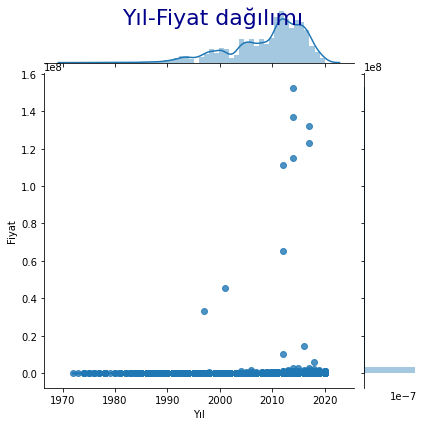

In [85]:
plt.figure(figsize=(20,6))
p = sns.jointplot(x="Yıl", y='Fiyat', data=new_cars, kind='reg');
p.fig.suptitle("Yıl-Fiyat dağılımı", fontsize=22, color='darkblue')

Text(0.5, 0.98, 'Kilometre-Fiyat dağılımı')

<Figure size 1440x432 with 0 Axes>

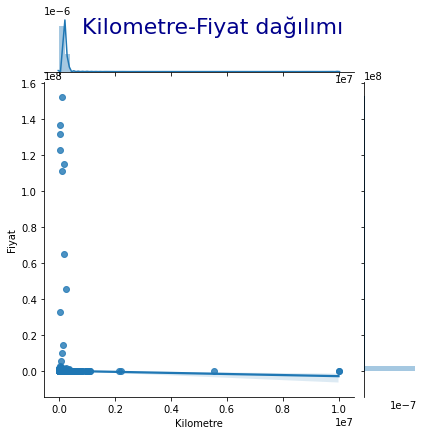

In [86]:
plt.figure(figsize=(20,6))
p = sns.jointplot(x="Kilometre", y='Fiyat', data=new_cars, kind='reg');
p.fig.suptitle("Kilometre-Fiyat dağılımı", fontsize=22, color='darkblue')

Text(0.5, 1.0, 'Araç-Yıl dağılımı')

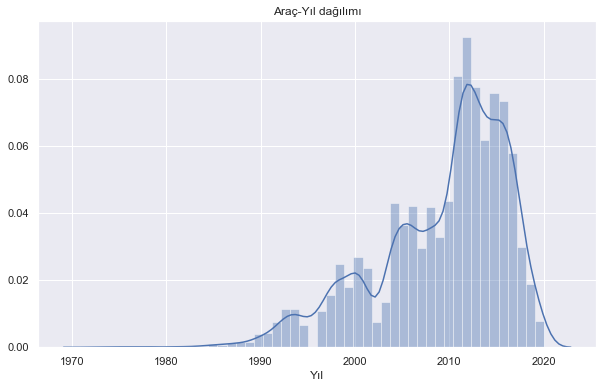

In [87]:
sns.set(color_codes=True)
plt.figure(figsize=(10,6))
x = new_cars.Yıl
sns.distplot(x);
plt.title('Araç-Yıl dağılımı')

## Outliers temizlik

In [16]:
new_cars = new_cars.loc[new_cars['Kilometre'] <= 350000,:]
new_cars = new_cars.loc[new_cars['Fiyat'] <= 750000,:]
new_cars = new_cars.loc[new_cars['Fiyat'] > 10000,:]

In [17]:
new_cars['MarkaModel'].nunique()

343

In [18]:
marka_value = new_cars.MarkaModel.value_counts()
marka_value

OpelAstra          1651
FordFocus          1640
RenaultClio        1281
ToyotaCorolla      1145
RenaultMegane      1046
                   ... 
ChevroletEvanda       1
RenaultEspace         1
Peugeot605            1
OpelOmega             1
CitroenXantia         1
Name: MarkaModel, Length: 343, dtype: int64

In [19]:
marka_index = list(marka_value[marka_value < 100 ].index)
for i in marka_index:
    new_cars.drop(new_cars[new_cars['MarkaModel'] == i].index, inplace=True) 

In [20]:
new_cars['MotorHacmi'] = new_cars.MotorHacmi.str.split(expand=True,)[0]

In [21]:
motor_hacmi = new_cars.MotorHacmi.value_counts()
motor_hacmi 

1598    4525
1461    2359
1248    1681
1560    1399
1401    1246
        ... 
2172       1
Düz        1
1272       1
2799       1
5501       1
Name: MotorHacmi, Length: 145, dtype: int64

In [22]:
motor_hacmi_index = list(motor_hacmi[motor_hacmi < 100 ].index)
for i in motor_hacmi_index:
    new_cars.drop(new_cars[new_cars['MotorHacmi'] == i].index  , inplace=True) 

In [23]:
new_cars['MotorHacmi'] = new_cars['MotorHacmi'].astype(str).astype('int32')

In [24]:
new_cars['MotorGücü'] = new_cars.MotorGücü.str.split(expand=True,)[0]

In [25]:
motor_gücü = new_cars.MotorGücü.value_counts()
motor_gücü 

90         2583
110        1696
75         1605
115        1363
105        1346
           ... 
65.000        1
230.000       1
147           1
89.000        1
123.456       1
Name: MotorGücü, Length: 117, dtype: int64

In [26]:
motor_gücü_index = list(motor_gücü[motor_gücü < 50 ].index)
for i in motor_gücü_index:
    new_cars.drop(new_cars[new_cars['MotorGücü'] == i].index  , inplace=True) 

In [27]:
new_cars['MotorGücü'] = new_cars['MotorGücü'].astype(str).astype('int32')

In [28]:
new_cars.head()

,Fiyat,Yıl,YakıtTipi,VitesTipi,MotorHacmi,MotorGücü,Kilometre,MarkaModel
1,429900,2020,Dizel,Yarı Otomatik,1598,120,3900,VolkswagenPassat
2,129900,2015,Dizel,Yarı Otomatik,1499,120,136023,FordFocus
3,119900,2015,Benzin,Düz,1197,90,136023,SkodaFabia
4,178000,2018,Dizel,Yarı Otomatik,1461,110,60159,RenaultMegane
5,102000,2017,Dizel,Düz,1461,90,70000,RenaultSymbol


## Visualazition

Text(0.5, 1.0, 'Marka-Fiyat bazında Araç bilgileri')

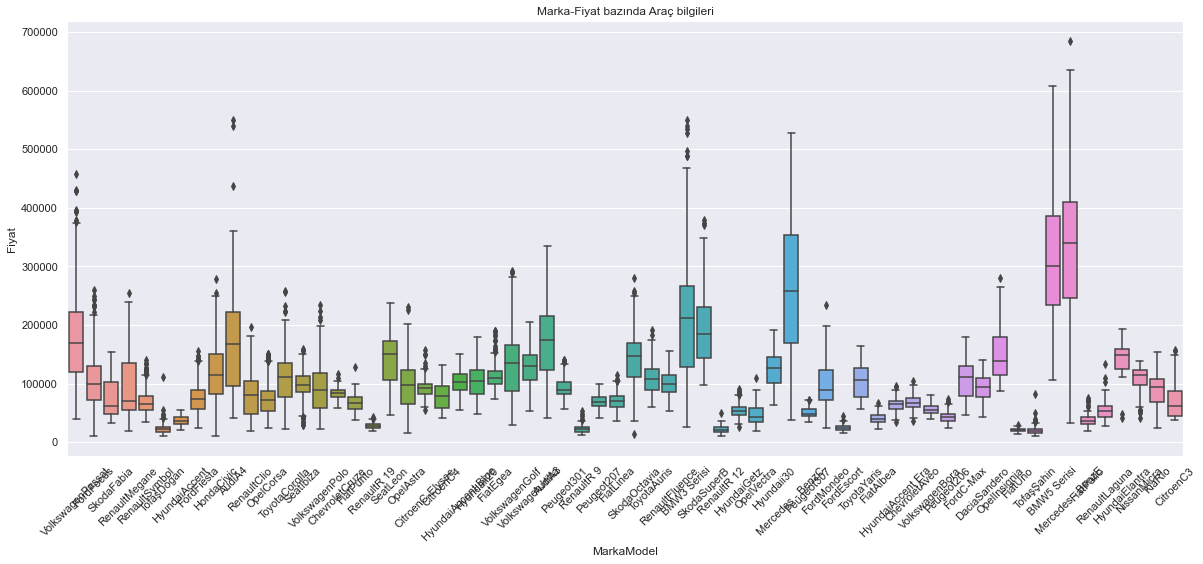

In [29]:
plt.figure(figsize=(20,8))
ax = sns.boxplot(x="MarkaModel", y="Fiyat", data=new_cars) 
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Marka-Fiyat bazında Araç bilgileri')


Text(0.5, 1.0, 'Marka-Kilometre bazında Araç bilgileri')

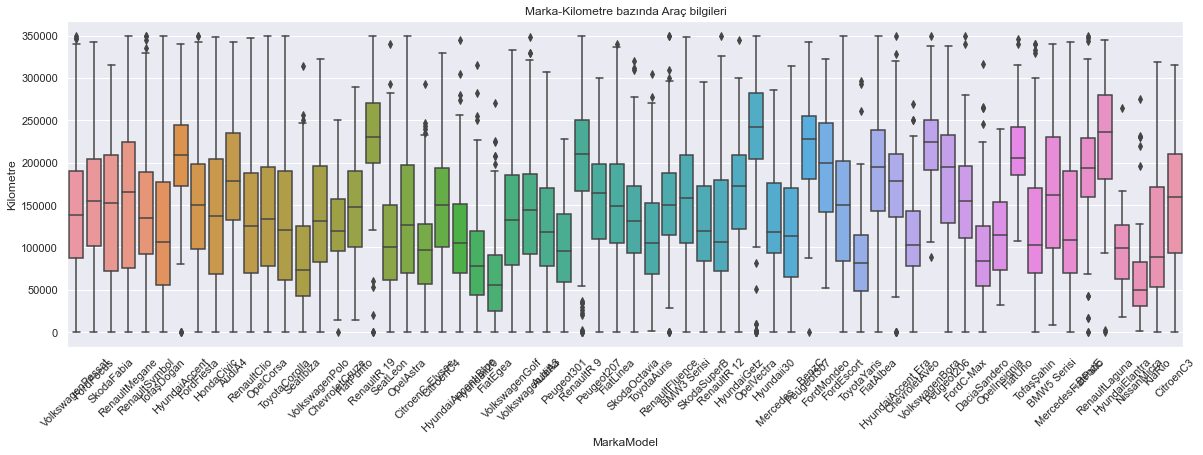

In [30]:
plt.figure(figsize=(20,6))
ax = sns.boxplot(x="MarkaModel", y="Kilometre", data=new_cars) 
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Marka-Kilometre bazında Araç bilgileri')

In [31]:
new_cars.describe()

,Fiyat,Yıl,MotorHacmi,MotorGücü,Kilometre
count,22516.000000,22516.000000,22516.000000,22516.000000,22516.000000
mean,100279.796900,2010.207941,1463.242050,100.022606,141201.606902
std,62351.741655,6.334745,160.818385,22.987460,76969.496064
min,10250.000000,1975.000000,999.000000,51.000000,0.000000
25%,59500.000000,2007.000000,1372.000000,83.000000,82000.000000
50%,88750.000000,2012.000000,1461.000000,99.000000,138000.000000
75%,125064.000000,2015.000000,1596.000000,115.000000,197637.500000
max,685000.000000,2020.000000,1998.000000,201.000000,350000.000000


In [32]:
new_cars.groupby('MarkaModel').agg(['mean','std','max','min'])

Fiyat                                         Yıl  \
                           mean            std     max     min         mean   
MarkaModel                                                                    
AudiA3            174537.579861   64128.796150  335000   41500  2012.861111   
AudiA4            174882.352941   94190.504936  550000   42000  2010.421569   
BMW3 Serisi       203039.668571  100809.270265  550000   26000  2010.408571   
BMW5 Serisi       308422.479290  107638.234666  607900  107000  2012.852071   
ChevroletAveo      68921.928571   12494.072069  103750   36250  2011.459184   
...                         ...            ...     ...     ...          ...   
VolkswagenBora     56505.343511    9701.536857   80000   39000  2002.183206   
VolkswagenGolf    131315.144492   52841.036752  292000   29750  2011.499285   
VolkswagenJetta   127968.623377   30756.129251  205000   53750  2012.486291   
VolkswagenPassat  175328.675916   72659.479844  458000   40000  2012.743618   
VolkswagenPolo     89226.342891   38365.365971  235000   22500  2009.671446   

                                         MotorHacmi                          \
                       std   max   min         mean         std   max   min   
MarkaModel                                                                    
AudiA3            4.072704  2020  2000  1534.378472  113.433947  1968  1197   
AudiA4            4.466456  2020  1997  1731.352941  204.193640  1968  1201   
BMW3 Serisi       6.082662  2020  1981  1681.154286  220.558536  1995  1200   
BMW5 Serisi       2.689598  2018  2007  1725.011834  225.926610  1995  1401   
ChevroletAveo     1.261388  2015  2006  1309.979592   84.841390  1401  1200   
...                    ...   ...   ...          ...         ...   ...   ...   
VolkswagenBora    1.940664  2005  1999  1589.122137   33.518542  1601  1401   
VolkswagenGolf    5.475231  2020  1994  1499.763948  156.075518  1968   999   
VolkswagenJetta   2.761502  2020  2006  1467.085137  154.856497  1968  1197   
VolkswagenPassat  4.108227  2020  1998  1593.280799  159.687730  1968  1201   
VolkswagenPolo    6.370597  2020  1995  1388.653524  154.566192  1601   999   

                   MotorGücü                           Kilometre  \
                        mean        std  max  min           mean   
MarkaModel                                                         
AudiA3            111.159722  11.543382  151  101  122616.656250   
AudiA4            140.098039  30.340154  201  101  180802.411765   
BMW3 Serisi       151.222857  27.229925  184   76  161157.471429   
BMW5 Serisi       174.065089  17.676370  201  151  164651.426036   
ChevroletAveo      85.336735  15.115326  101   51  113388.530612   
...                      ...        ...  ...  ...            ...   
VolkswagenBora    103.274809   1.780464  105  101  219965.091603   
VolkswagenGolf    108.366237  12.184132  170   75  132879.214592   
VolkswagenJetta   108.756133   9.442692  170   75  141140.676768   
VolkswagenPassat  119.511654  14.040304  177  100  141860.556049   
VolkswagenPolo     83.304659  12.144234  180   51  138985.924731   

                                               
                           std     max    min  
MarkaModel                                     
AudiA3            71213.370668  307000      0  
AudiA4            77332.532413  342000      1  
BMW3 Serisi       75008.959654  348000      0  
BMW5 Serisi       79931.179719  340000   8000  
ChevroletAveo     54158.915716  269000     71  
...                        ...     ...    ...  
VolkswagenBora    52728.563993  350000  89000  
VolkswagenGolf    72806.565479  333333      0  
VolkswagenJetta   65483.828581  348000    160  
VolkswagenPassat  77819.577456  350000      0  
VolkswagenPolo    73769.289945  323000      0  

[64 rows x 20 columns]

In [33]:
new_cars['YakıtTipi'].nunique()

3

In [34]:
yakıt_count = new_cars.YakıtTipi.value_counts()
yakıt_count

 Dizel               10675
 LPG & Benzin         7119
 Benzin               4722
Name: YakıtTipi, dtype: int64

In [35]:
vitestip = new_cars.VitesTipi.value_counts()
vitestip

 Düz                  16246
 Yarı Otomatik         3900
 Otomatik              2370
Name: VitesTipi, dtype: int64

In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(new_cars["YakıtTipi"])
new_cars["YakıtTipi"] = le.transform(new_cars["YakıtTipi"])

In [37]:
le.fit(new_cars["VitesTipi"])
new_cars["VitesTipi"] = le.transform(new_cars["VitesTipi"])

In [38]:
df_car = new_cars.copy()

In [39]:
new_cars = pd.get_dummies(new_cars, columns=['MarkaModel'])

In [40]:
new_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22516 entries, 1 to 28955
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Fiyat                          22516 non-null  int64
 1   Yıl                            22516 non-null  int64
 2   YakıtTipi                      22516 non-null  int32
 3   VitesTipi                      22516 non-null  int32
 4   MotorHacmi                     22516 non-null  int32
 5   MotorGücü                      22516 non-null  int32
 6   Kilometre                      22516 non-null  int64
 7   MarkaModel_AudiA3              22516 non-null  uint8
 8   MarkaModel_AudiA4              22516 non-null  uint8
 9   MarkaModel_BMW3 Serisi         22516 non-null  uint8
 10  MarkaModel_BMW5 Serisi         22516 non-null  uint8
 11  MarkaModel_ChevroletAveo       22516 non-null  uint8
 12  MarkaModel_ChevroletCruze      22516 non-null  uint8
 13  MarkaModel_Citro

In [41]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22516 entries, 1 to 28955
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Fiyat       22516 non-null  int64 
 1   Yıl         22516 non-null  int64 
 2   YakıtTipi   22516 non-null  int32 
 3   VitesTipi   22516 non-null  int32 
 4   MotorHacmi  22516 non-null  int32 
 5   MotorGücü   22516 non-null  int32 
 6   Kilometre   22516 non-null  int64 
 7   MarkaModel  22516 non-null  object
dtypes: int32(4), int64(3), object(1)
memory usage: 1.2+ MB


In [42]:
df_car.drop(columns=['Yıl'], inplace=True)
df_car.drop(columns=['YakıtTipi'], inplace=True)
df_car.drop(columns=['VitesTipi'], inplace=True)
df_car.drop(columns=['MotorGücü'], inplace=True)
df_car.drop(columns=['MotorHacmi'], inplace=True)

In [43]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22516 entries, 1 to 28955
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Fiyat       22516 non-null  int64 
 1   Kilometre   22516 non-null  int64 
 2   MarkaModel  22516 non-null  object
dtypes: int64(2), object(1)
memory usage: 703.6+ KB


In [44]:
df_car.groupby('MarkaModel').agg(['mean','std','max','min'])

Fiyat                                     Kilometre  \
                           mean            std     max     min           mean   
MarkaModel                                                                      
AudiA3            174537.579861   64128.796150  335000   41500  122616.656250   
AudiA4            174882.352941   94190.504936  550000   42000  180802.411765   
BMW3 Serisi       203039.668571  100809.270265  550000   26000  161157.471429   
BMW5 Serisi       308422.479290  107638.234666  607900  107000  164651.426036   
ChevroletAveo      68921.928571   12494.072069  103750   36250  113388.530612   
...                         ...            ...     ...     ...            ...   
VolkswagenBora     56505.343511    9701.536857   80000   39000  219965.091603   
VolkswagenGolf    131315.144492   52841.036752  292000   29750  132879.214592   
VolkswagenJetta   127968.623377   30756.129251  205000   53750  141140.676768   
VolkswagenPassat  175328.675916   72659.479844  458000   40000  141860.556049   
VolkswagenPolo     89226.342891   38365.365971  235000   22500  138985.924731   

                                               
                           std     max    min  
MarkaModel                                     
AudiA3            71213.370668  307000      0  
AudiA4            77332.532413  342000      1  
BMW3 Serisi       75008.959654  348000      0  
BMW5 Serisi       79931.179719  340000   8000  
ChevroletAveo     54158.915716  269000     71  
...                        ...     ...    ...  
VolkswagenBora    52728.563993  350000  89000  
VolkswagenGolf    72806.565479  333333      0  
VolkswagenJetta   65483.828581  348000    160  
VolkswagenPassat  77819.577456  350000      0  
VolkswagenPolo    73769.289945  323000      0  

[64 rows x 8 columns]

In [45]:
for column in df_car.columns[0:2]:
    for spec in df_car['MarkaModel'].unique():
        
        selected_spec = df_car[df_car["MarkaModel"] == spec] 
        selected_column = selected_spec[column]
              
        q1 = selected_column.quantile(0.25)  
        q3 = selected_column.quantile(0.75)
        
        iqr = q3 - q1
        
        minimum = q1 - (1.5 * iqr )
        maximum = q3 + (1.5 * iqr )
        
        # print(column, spec, '| min = ', minimum, 'max=', maximum)
        
        max_idxs = df_car[(df_car['MarkaModel'] == spec) & (df_car[column] > maximum)].index
        # print('Max:', max_idxs)
        min_idxs = df_car[(df_car['MarkaModel'] == spec) & (df_car[column] < minimum)].index
        # print('min:', min_idxs)
        # print('--------------------------------------------------------------------------')
        
        new_cars.drop(index=max_idxs, inplace=True)

In [46]:
new_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22244 entries, 2 to 28955
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Fiyat                          22244 non-null  int64
 1   Yıl                            22244 non-null  int64
 2   YakıtTipi                      22244 non-null  int32
 3   VitesTipi                      22244 non-null  int32
 4   MotorHacmi                     22244 non-null  int32
 5   MotorGücü                      22244 non-null  int32
 6   Kilometre                      22244 non-null  int64
 7   MarkaModel_AudiA3              22244 non-null  uint8
 8   MarkaModel_AudiA4              22244 non-null  uint8
 9   MarkaModel_BMW3 Serisi         22244 non-null  uint8
 10  MarkaModel_BMW5 Serisi         22244 non-null  uint8
 11  MarkaModel_ChevroletAveo       22244 non-null  uint8
 12  MarkaModel_ChevroletCruze      22244 non-null  uint8
 13  MarkaModel_Citro

In [47]:
# plt.figure(figsize=(20,8))
# example of a better corr matrix
# sns.heatmap(new_cars.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);


In [48]:
# sns.pairplot(new_cars, plot_kws=dict(alpha=.1, edgecolor='none'))

## *********** 

## Statsmodel 

In [49]:
new_cars2 = new_cars.copy()

In [50]:
new_cars2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22244 entries, 2 to 28955
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Fiyat                          22244 non-null  int64
 1   Yıl                            22244 non-null  int64
 2   YakıtTipi                      22244 non-null  int32
 3   VitesTipi                      22244 non-null  int32
 4   MotorHacmi                     22244 non-null  int32
 5   MotorGücü                      22244 non-null  int32
 6   Kilometre                      22244 non-null  int64
 7   MarkaModel_AudiA3              22244 non-null  uint8
 8   MarkaModel_AudiA4              22244 non-null  uint8
 9   MarkaModel_BMW3 Serisi         22244 non-null  uint8
 10  MarkaModel_BMW5 Serisi         22244 non-null  uint8
 11  MarkaModel_ChevroletAveo       22244 non-null  uint8
 12  MarkaModel_ChevroletCruze      22244 non-null  uint8
 13  MarkaModel_Citro

In [51]:
new_cars2.head()

,Fiyat,Yıl,YakıtTipi,VitesTipi,MotorHacmi,MotorGücü,Kilometre,MarkaModel_AudiA3,MarkaModel_AudiA4,MarkaModel_BMW3 Serisi,...,MarkaModel_TofaşDoğan,MarkaModel_TofaşŞahin,MarkaModel_ToyotaAuris,MarkaModel_ToyotaCorolla,MarkaModel_ToyotaYaris,MarkaModel_VolkswagenBora,MarkaModel_VolkswagenGolf,MarkaModel_VolkswagenJetta,MarkaModel_VolkswagenPassat,MarkaModel_VolkswagenPolo
2,129900,2015,1,2,1499,120,136023,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,119900,2015,0,0,1197,90,136023,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,178000,2018,1,2,1461,110,60159,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,102000,2017,1,0,1461,90,70000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,13000,1988,2,0,1581,83,5000,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [53]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

X = new_cars2.drop(columns=['Fiyat','MotorHacmi','MotorGücü'], axis=1)
y = new_cars2['Fiyat']

cars_model = sm.OLS(y, X, data=new_cars2)

results = cars_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Fiyat   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     2069.
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        08:04:22   Log-Likelihood:            -2.5467e+05
No. Observations:               22244   AIC:                         5.095e+05
Df Residuals:                   22176   BIC:                         5.100e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Yıl                            5161.6330     44.659    115.578      0.000    5074.098    5249.169
YakıtTipi                       794.3183    248.877      3.192      0.001     306.502    1282.135
VitesTipi                      1.184e+04    239.280     49.487      0.000    1.14e+04    1.23e+04
Kilometre                        -0.1447      0.003    -52.629      0.000      -0.150      -0.139
MarkaModel_AudiA3             -1.022e+07   9.01e+04   -113.457      0.000   -1.04e+07      -1e+07
MarkaModel_AudiA4              -1.02e+07   9.01e+04   -113.239      0.000   -1.04e+07      -1e+07
MarkaModel_BMW3 Serisi        -1.017e+07      9e+04   -112.972      0.000   -1.03e+07   -9.99e+06
MarkaModel_BMW5 Serisi        -1.008e+07   9.01e+04   -111.838      0.000   -1.03e+07    -9.9e+06
MarkaModel_ChevroletAveo       -1.03e+07   9.01e+04   -114.353      0.000   -1.05e+07   -1.01e+07
MarkaModel_ChevroletCruze     -1.029e+07   9.01e+04   -114.160      0.000   -1.05e+07   -1.01e+07
MarkaModel_CitroenC-Elysee     -1.03e+07   9.02e+04   -114.151      0.000   -1.05e+07   -1.01e+07
MarkaModel_CitroenC3          -1.029e+07      9e+04   -114.262      0.000   -1.05e+07   -1.01e+07
MarkaModel_CitroenC4          -1.028e+07   9.01e+04   -114.099      0.000   -1.05e+07   -1.01e+07
MarkaModel_DaciaSandero       -1.029e+07   9.02e+04   -114.171      0.000   -1.05e+07   -1.01e+07
MarkaModel_FiatAlbea          -1.029e+07      9e+04   -114.367      0.000   -1.05e+07   -1.01e+07
MarkaModel_FiatEgea           -1.029e+07   9.02e+04   -114.113      0.000   -1.05e+07   -1.01e+07
MarkaModel_FiatLinea           -1.03e+07   9.02e+04   -114.217      0.000   -1.05e+07   -1.01e+07
MarkaModel_FiatPalio          -1.028e+07   8.98e+04   -114.399      0.000   -1.05e+07   -1.01e+07
MarkaModel_FiatPunto          -1.029e+07   9.01e+04   -114.285      0.000   -1.05e+07   -1.01e+07
MarkaModel_FiatUno            -1.026e+07   8.96e+04   -114.466      0.000   -1.04e+07   -1.01e+07
MarkaModel_FordC-Max          -1.025e+07   9.01e+04   -113.748      0.000   -1.04e+07   -1.01e+07
MarkaModel_FordEscort         -1.026e+07   8.95e+04   -114.636      0.000   -1.04e+07   -1.01e+07
MarkaModel_FordFiesta         -1.028e+07      9e+04   -114.198      0.000   -1.05e+07   -1.01e+07
MarkaModel_FordFocus          -1.026e+07   9.01e+04   -113.881      0.000   -1.04e+07   -1.01e+07
MarkaModel_FordMondeo         -1.025e+07   9.02e+04   -113.696      0.000   -1.04e+07   -1.01e+07
MarkaModel_HondaCivic         -1.024e+07      9e+04   -113.791      0.000   -1.04e+07   -1.01e+07
MarkaModel_HyundaiAccent      -1.027e+07   8.98e+04   -114.341      0.000   -1.04e+07   -1.01e+07
MarkaModel_HyundaiAccent Blue -1.028e+07   9.02e+04   -114.074      0.000   -1.05e+07   -1.01e+07
MarkaModel_HyundaiAccent Era  -1.029e+07   9.

In [52]:
X = new_cars2.drop(columns=['Fiyat','MotorHacmi','MotorGücü'], axis=1)
y = new_cars2['Fiyat']

Text(0.5, 1.0, 'Normal Q-Q plot')

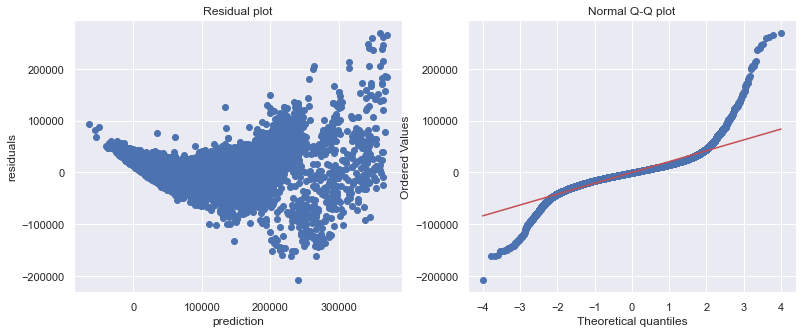

In [54]:
import patsy
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,5))

rgr = LinearRegression()
fit = rgr.fit(X,y)
pred = rgr.predict(X)

# plt.subplot(1, 3, 1)
# plt.scatter(X,y)
# plt.plot(X, pred, color='blue',linewidth=1)
# plt.title("Regression fit")
# plt.xlabel("x")
# plt.ylabel("y")
    
plt.subplot(1, 3, 2)
res = y - pred
plt.scatter(pred, res)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals")
    
plt.subplot(1, 3, 3)
#Generates a probability plot of sample data against the quantiles of a 
# specified theoretical distribution 
stats.probplot(res, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")

In [55]:
new_cars3 = new_cars2.copy()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


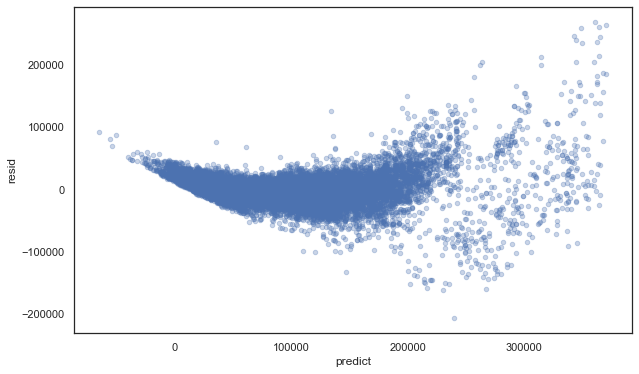

In [56]:
# create residual plot
new_cars3['predict']=fit.predict(X)
new_cars3['resid']= y-new_cars3.predict
with sns.axes_style('white'):
     plot = new_cars3.plot(
         kind='scatter', x='predict', y='resid', alpha=0.3, figsize=(10,6))

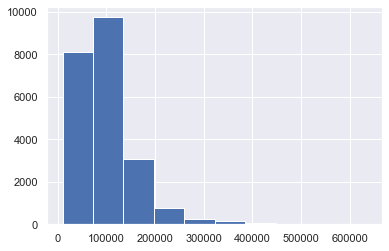

In [57]:
# create histogram
new_cars3.Fiyat.hist();

# note the positive skew

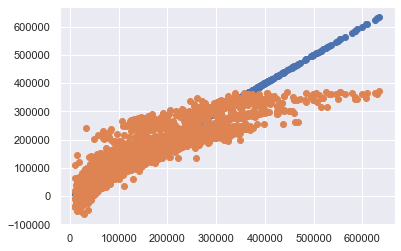

In [58]:
plt.scatter(new_cars3.Fiyat,y)
plt.scatter(new_cars3.Fiyat,new_cars3.predict);

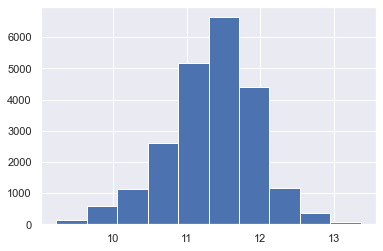

In [59]:
# try log transformation
np.log(new_cars3.Fiyat).hist();

## Feature engineering

In [60]:
new_cars2['FarkYıl'] = 2020 - new_cars2['Yıl']
new_cars2.drop(columns=['Yıl'], inplace=True)

In [61]:
new_cars2['FarkYıl^2'] = new_cars2['FarkYıl'] * new_cars2['FarkYıl']

In [62]:
new_cars2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22244 entries, 2 to 28955
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Fiyat                          22244 non-null  int64
 1   YakıtTipi                      22244 non-null  int32
 2   VitesTipi                      22244 non-null  int32
 3   MotorHacmi                     22244 non-null  int32
 4   MotorGücü                      22244 non-null  int32
 5   Kilometre                      22244 non-null  int64
 6   MarkaModel_AudiA3              22244 non-null  uint8
 7   MarkaModel_AudiA4              22244 non-null  uint8
 8   MarkaModel_BMW3 Serisi         22244 non-null  uint8
 9   MarkaModel_BMW5 Serisi         22244 non-null  uint8
 10  MarkaModel_ChevroletAveo       22244 non-null  uint8
 11  MarkaModel_ChevroletCruze      22244 non-null  uint8
 12  MarkaModel_CitroenC-Elysee     22244 non-null  uint8
 13  MarkaModel_Citro

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 

In [ ]:
new_cars2['FarkYıl'] = 2020 - new_cars2['Yıl']
new_cars2.drop(columns=['Yıl'], inplace=True)

In [ ]:
new_cars2['FarkYıl^2'] = new_cars2['FarkYıl'] * new_cars2['FarkYıl']

In [64]:
X = new_cars2.drop(columns=['Fiyat','FarkYıl','MotorHacmi', 'MotorGücü'], axis=1)
y = new_cars2['Fiyat']

In [65]:
split_and_validate(X, y)


Validation R^2 score was: 0.8312123188749798
Feature coefficient results: 

YakıtTipi : -627.47
VitesTipi : 14135.55
Kilometre : -0.23
MarkaModel_AudiA3 : 39695.38
MarkaModel_AudiA4 : 57818.31
MarkaModel_BMW3 Serisi : 88846.52
MarkaModel_BMW5 Serisi : 181109.69
MarkaModel_ChevroletAveo : -47131.81
MarkaModel_ChevroletCruze : -30554.89
MarkaModel_CitroenC-Elysee : -32042.24
MarkaModel_CitroenC3 : -30322.19
MarkaModel_CitroenC4 : -23171.26
MarkaModel_DaciaSandero : -30848.04
MarkaModel_FiatAlbea : -38322.37
MarkaModel_FiatEgea : -24665.62
MarkaModel_FiatLinea : -37205.59
MarkaModel_FiatPalio : -26593.77
MarkaModel_FiatPunto : -37493.17
MarkaModel_FiatUno : -6455.71
MarkaModel_FordC-Max : 9956.05
MarkaModel_FordEscort : -6963.41
MarkaModel_FordFiesta : -26108.96
MarkaModel_FordFocus : -421.27
MarkaModel_FordMondeo : 11027.78
MarkaModel_HondaCivic : 13176.90
MarkaModel_HyundaiAccent : -18943.55
MarkaModel_HyundaiAccent Blue : -22560.19
MarkaModel_HyundaiAccent Era : -29919.97
MarkaModel_H

In [66]:
new_cars2['Km<30000'] = ( new_cars2.Kilometre < 30000 ) 
new_cars2['Km<75000'] = ( new_cars2.Kilometre > 30000 ) & ( new_cars2.Kilometre < 75000 )
new_cars2['Km<125000'] = ( new_cars2.Kilometre > 75000 ) & ( new_cars2.Kilometre < 125000 )
new_cars2['Km<200000'] = ( new_cars2.Kilometre > 125000 ) & ( new_cars2.MotorHacmi < 200000 )
new_cars2['Km>200000'] = ( new_cars2.Kilometre > 200000 )
new_cars2.drop(columns=['Kilometre'], inplace=True)

In [67]:
new_cars2['MotorHacmi<1200'] = ( new_cars2.MotorHacmi < 1200 ) 
new_cars2['MotorHacmi<1400'] = ( new_cars2.MotorHacmi > 1200 ) & ( new_cars2.MotorHacmi < 1400 )
new_cars2['MotorHacmi<1600'] = ( new_cars2.MotorHacmi > 1400 ) & ( new_cars2.MotorHacmi < 1600 )
new_cars2['MotorHacmi<2000'] = ( new_cars2.MotorHacmi > 1600 ) & ( new_cars2.MotorHacmi < 2000 )
new_cars2['MotorHacmi>2000'] = ( new_cars2.MotorHacmi > 2000 )
new_cars2.drop(columns=['MotorHacmi'], inplace=True)

In [68]:
new_cars2['MotorGücü<75'] = ( new_cars2.MotorGücü < 75 ) 
new_cars2['MotorGücü<100'] = ( new_cars2.MotorGücü > 76 ) & ( new_cars2.MotorGücü < 100 )
new_cars2['MotorGücü<125'] = ( new_cars2.MotorGücü > 101 ) & ( new_cars2.MotorGücü < 125 )
new_cars2['MotorGücü<150'] = ( new_cars2.MotorGücü > 126 ) & ( new_cars2.MotorGücü < 150 )
new_cars2['MotorGücü>151'] = ( new_cars2.MotorGücü > 151 )
new_cars2.drop(columns=['MotorGücü'], inplace=True)

In [69]:
new_cars2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22244 entries, 2 to 28955
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Fiyat                          22244 non-null  int64
 1   YakıtTipi                      22244 non-null  int32
 2   VitesTipi                      22244 non-null  int32
 3   MarkaModel_AudiA3              22244 non-null  uint8
 4   MarkaModel_AudiA4              22244 non-null  uint8
 5   MarkaModel_BMW3 Serisi         22244 non-null  uint8
 6   MarkaModel_BMW5 Serisi         22244 non-null  uint8
 7   MarkaModel_ChevroletAveo       22244 non-null  uint8
 8   MarkaModel_ChevroletCruze      22244 non-null  uint8
 9   MarkaModel_CitroenC-Elysee     22244 non-null  uint8
 10  MarkaModel_CitroenC3           22244 non-null  uint8
 11  MarkaModel_CitroenC4           22244 non-null  uint8
 12  MarkaModel_DaciaSandero        22244 non-null  uint8
 13  MarkaModel_FiatA

In [71]:
X = new_cars2.drop(columns=['Fiyat','FarkYıl'], axis=1)
y = new_cars2['Fiyat']
split_and_validate(X, y)


Validation R^2 score was: 0.8382302462463761
Feature coefficient results: 

YakıtTipi : -808.11
VitesTipi : 14695.77
MarkaModel_AudiA3 : 22602790775292.86
MarkaModel_AudiA4 : 22602790806701.82
MarkaModel_BMW3 Serisi : 22602790825346.18
MarkaModel_BMW5 Serisi : 22602790922948.13
MarkaModel_ChevroletAveo : 22602790690939.44
MarkaModel_ChevroletCruze : 22602790708202.90
MarkaModel_CitroenC-Elysee : 22602790701350.60
MarkaModel_CitroenC3 : 22602790706282.64
MarkaModel_CitroenC4 : 22602790712620.74
MarkaModel_DaciaSandero : 22602790701924.10
MarkaModel_FiatAlbea : 22602790698613.90
MarkaModel_FiatEgea : 22602790713128.76
MarkaModel_FiatLinea : 22602790701658.07
MarkaModel_FiatPalio : 22602790710715.58
MarkaModel_FiatPunto : 22602790701668.42
MarkaModel_FiatUno : 22602790731888.91
MarkaModel_FordC-Max : 22602790746038.75
MarkaModel_FordEscort : 22602790725154.05
MarkaModel_FordFiesta : 22602790710937.23
MarkaModel_FordFocus : 22602790733082.69
MarkaModel_FordMondeo : 22602790748486.52
Marka

## Validation

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X = new_cars2.drop(columns=['Fiyat'], axis=1)
y = new_cars2['Fiyat']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=42)

In [75]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=0.05)
lm_lasso = Lasso(alpha=0.05)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [76]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_lasso.fit(X_train_scaled, y_train)
print(f'Lasso Regression val R^2: {lm_lasso.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')


Linear Regression val R^2: 0.877
Ridge Regression val R^2: 0.877


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 817303151333.5483, tolerance: 5182865780.006143
  positive)


Lasso Regression val R^2: 0.877
Degree 2 polynomial regression val R^2: 0.930


## Cross Validation

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold

# simple linear regression
lm = LinearRegression()

alphavec = 10**np.linspace(-2,2,200)
lm_ridge = RidgeCV(alphas=alphavec)
lm_lasso = LassoCV(alphas=alphavec)


In [78]:
kf = KFold(n_splits=10, shuffle=True, random_state = 8000)

print('Linear Reg.:', np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))
print('Ridge      :', np.mean(cross_val_score(lm_ridge, X, y, cv=kf, scoring='r2')))
print('Lasso      :', np.mean(cross_val_score(lm_lasso, X, y, cv=kf, scoring='r2')))

Linear Reg.: 0.8760753167669219
Ridge      : 0.8760830652434256


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 561865612386.5449, tolerance: 6118246349.25977
  positive)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331555546908.917, tolerance: 6096863304.230391
  positive)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199604246711.77832, tolerance: 6184844740.150364
  positive)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

Lasso      : 0.8760765737204134


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114969409217.96973, tolerance: 6037670604.730993
  positive)


## Final - Ridge Regression

In [79]:
alphavec = 10**np.linspace(-2,2,200)
ridgeReg = RidgeCV(alphas = alphavec, cv=5)

X = new_cars2.drop(columns=['Fiyat'], axis=1)
y = new_cars2['Fiyat']

#Split the data 60 - 20 - 20 train/val/test

# X_train, X_cv, y_train, y_cv = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size =0.2, random_state=43)

In [80]:
ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_cv)

##calculating mse

mse = np.mean((pred - y_cv)**2)

print ('Ridge score:', ridgeReg.score(X_cv, y_cv))
print ('mse değeri :', mse )

Ridge score: 0.8865414638328492
mse değeri : 434573525.8700235


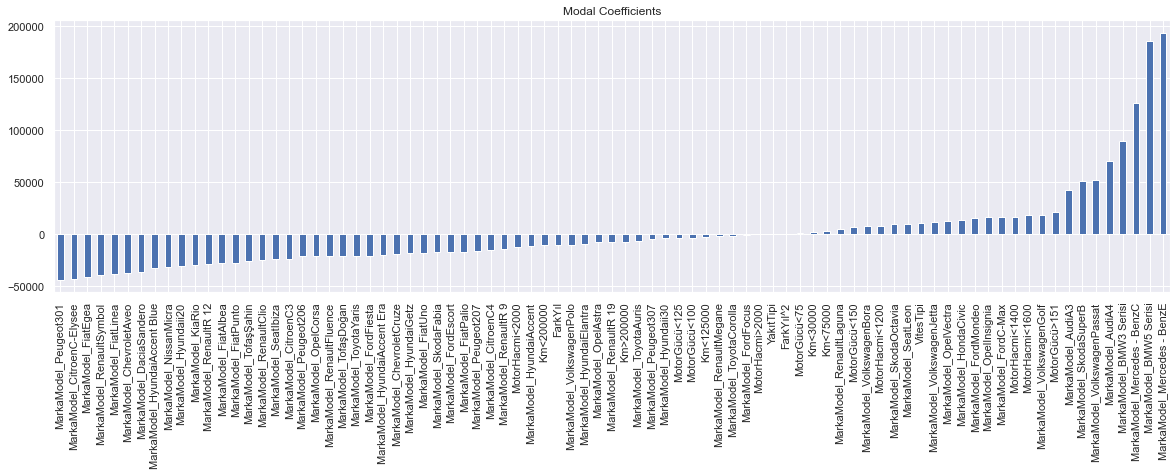

In [82]:
from pandas import Series, DataFrame
predictors = X_train.columns

coef = Series(ridgeReg.coef_,predictors).sort_values()
plt.figure(figsize=(20,5))
coef.plot(kind='bar', title='Modal Coefficients')

## Final - Lasso Regression

In [83]:
alphavec = 10**np.linspace(-2,2,200)
lassoReg = LassoCV(alphas = alphavec, cv=5, normalize=True)

lassoReg.fit(X_train,y_train)

pred = lassoReg.predict(X_cv)

#calculating mse

mse = np.mean((pred - y_cv)**2)

lassoReg.score(X_cv,y_cv)
print ('Lasso score:', lassoReg.score(X_cv, y_cv))


Lasso score: 0.8865636561442279
mse değeri : 434488523.97127646


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 489242265507.68945, tolerance: 6607258801.753186
  positive)


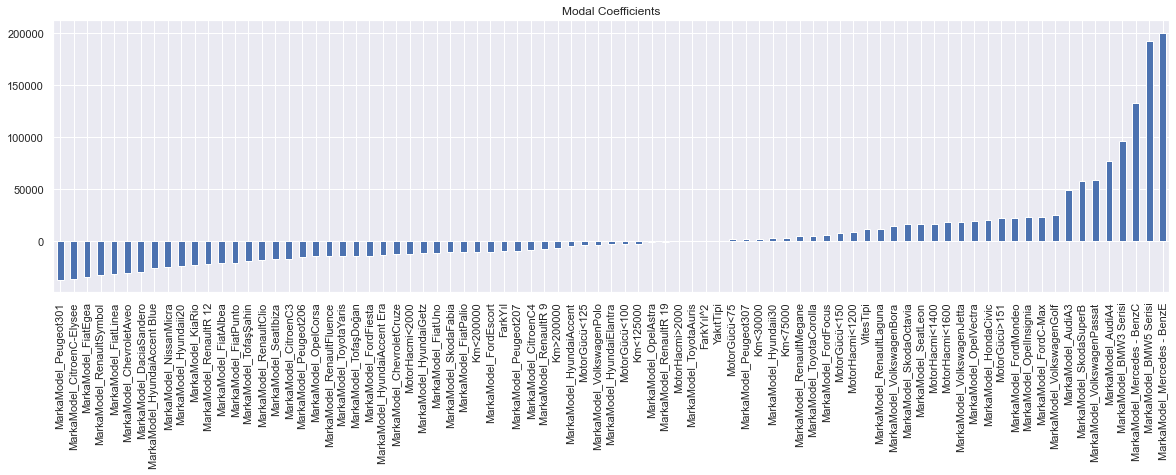

In [85]:
predictors = X_train.columns

coef = Series(lassoReg.coef_,predictors).sort_values()
plt.figure(figsize=(20,5))
coef.plot(kind='bar', title='Modal Coefficients')

In [86]:
coeff = DataFrame(X_train.columns)

coeff['Coefficient Estimate'] = Series(lassoReg.coef_)

coeff

,0,Coefficient Estimate
0,YakıtTipi,198.222062
1,VitesTipi,10931.658515
2,MarkaModel_AudiA3,49354.331058
3,MarkaModel_AudiA4,77222.424499
4,MarkaModel_BMW3 Serisi,95750.789608
...,...,...
78,MotorGücü<75,1384.676032
79,MotorGücü<100,-3249.198221
80,MotorGücü<125,-4027.625198
81,MotorGücü<150,7221.588702
